## Lab 1: Getting data from API's

Hanna Svenson


**1. Practice writing queries using the saferproducts.gov API and your web browser.**

Some sample queries used:

    https://www.saferproducts.gov/RestWebServices/Recall?format=json&ProductType=Food
    https://www.saferproducts.gov/RestWebServices/Recall?format=json&ProductType=Bicycle&injury=concussion
    https://www.saferproducts.gov/RestWebServices/Recall?format=json&Manufacturer=bosch

**2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.**

In [1]:
import pandas as pd
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Shoe' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

In [2]:
df = pd.DataFrame.from_dict(data)
df.head()

,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,...,Manufacturers,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions
0,6651,16097,2016-02-09T00:00:00,This recall involves Classic Characters' infan...,https://www.cpsc.gov/Recalls/2016/Classic-Char...,Classic Characters Recalls Infant Booties Due ...,"Classic Characters, Inc. toll-free at 866-274-...",2016-02-09T00:00:00,"[{'Name': 'Infant Elf Booties', 'Description':...",[],...,[],[{'Name': 'Cracker Barrel Old Country Store na...,"[{'Name': 'Classic Characters Inc., of Quebec,...",[],None,[{'Country': 'China'}],[],[{'Name': 'The pompoms at the tip of the toe c...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]
1,1773,14284,2014-09-30T00:00:00,The recall involves First Impressions high-top...,https://www.cpsc.gov/Recalls/2014/Trimfoot-Rec...,Trimfoot Recalls Children's Soft-Soled Sneaker...,Trimfoot at (800) 325-6116 from 8 a.m. to 4:30...,2015-01-09T00:00:00,"[{'Name': 'Children's soft-soled shoes', 'Desc...",[],...,[],[{'Name': 'Macy's stores nationwide from Febru...,"[{'Name': 'Trimfoot Co. LLC., of Farmington, M...",[],None,[{'Country': 'China'}],[],[{'Name': 'A small metal eyelet can detach fro...,[{'Name': 'Consumers should immediately take t...,[{'Option': 'Refund'}]
2,1761,14269,2014-09-04T00:00:00,The recalled Livie & Luca children's shoes inc...,https://www.cpsc.gov/Recalls/2014/Livie-and-Lu...,Livie & Luca Recalls Children's Shoes Due to L...,Livie & Luca toll-free at (888) 548-5822 from ...,2015-07-24T00:00:00,"[{'Name': 'Carta and ""Cotton"" Children's Shoes...",[],...,[],[{'Name': 'Children's boutiques including Read...,"[{'Name': 'Livie and Luca, of Emeryville, Cali...",[],None,[{'Country': 'Mexico'}],[],[{'Name': 'A metal thread inside the interior ...,[{'Name': 'Consumers should immediately take t...,"[{'Option': 'Replace'}, {'Option': 'Refund'}]"
3,1627,14111,2014-02-20T00:00:00,The Runestone children's shoes are black with ...,https://www.cpsc.gov/Recalls/2014/Eastman-Foot...,Eastman Footwear Recalls Coleman Runestone Chi...,Eastman Footwear at (800)786-0282 ext. 301 fro...,2015-07-31T00:00:00,[{'Name': 'Coleman® Runestone Style Children's...,[],...,[],[{'Name': 'Big 5 Sporting Goods retail stores ...,"[{'Name': 'The Eastman Footwear Group Inc., of...",[],None,[{'Country': 'China'}],[],[{'Name': 'The metal rivets surrounding the ho...,[{'Name': 'Consumers should immediately stop u...,[]
4,1555,14031,2013-11-26T00:00:00,This recall involves infant girl sandals sold ...,https://www.cpsc.gov/Recalls/2014/American-Boy...,American Boy and Girl Recalls Infant Sandals D...,American Boy and Girl at (800) 689-9237 from 9...,2015-01-07T00:00:00,"[{'Name': 'Girl's ""Susan"" Sandals', 'Descripti...",[],...,[],"[{'Name': 'Meijer Stores in Illinois, Indiana,...","[{'Name': 'American Boy and Girl (ABG), of Eli...",[],None,[{'Country': 'China'}],[],[{'Name': 'The top strap can be pulled loose f...,[{'Name': 'Consumers should immediately take t...,"[{'Option': 'Replace'}, {'Option': 'Refund'}]"


**3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.**

I reused the code to clean the remedy options, and then repeated the process for the manufacturing companies. 

In [3]:
# Flatten the 'RemedyOptions' column
temp = df['RemedyOptions']
clean_values = []

for i in range(len(temp)):
    if len(temp[i]) > 0:
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option'])
        clean_values.append(values)
    else:
        clean_values.append('')

# Add the cleaned values as a new column
df['remedy'] = clean_values

# Display the new remedy counts
print(df['remedy'].value_counts())


                     47
[Refund]              9
[Replace, Refund]     2
Name: remedy, dtype: int64


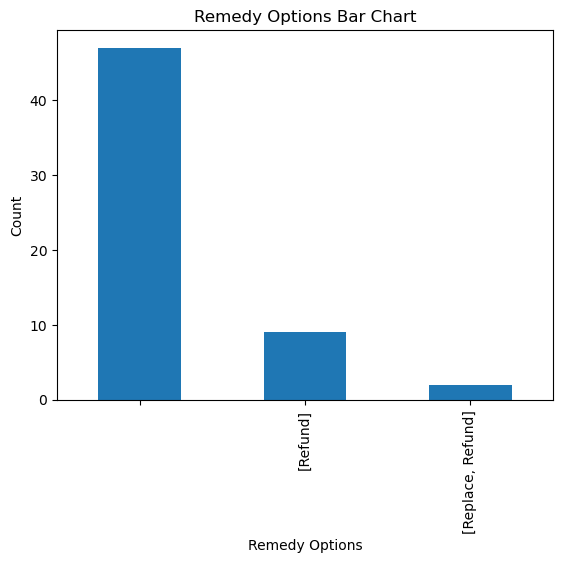

In [4]:
import matplotlib.pyplot as plt

df['remedy'].value_counts().plot(kind='bar')
plt.title('Remedy Options Bar Chart')
plt.xlabel('Remedy Options')
plt.ylabel('Count')
plt.show()

In [5]:
temp = df['ManufacturerCountries']
clean_countries = []

for i in range(len(temp)):
    if len(temp[i]) > 0: 
        countries = []
        for j in range(len(temp[i])):
            countries.append(temp[i][j]['Country']) 
        clean_countries.append(countries)  
    else:
        clean_countries.append('')  

# Add the cleaned country data as a new column
df['manufacturer_countries'] = clean_countries

# Display the updated DataFrame
print(df['manufacturer_countries'].value_counts())


[China]                  35
                         11
[United States]           2
[Mexico]                  1
[Spain]                   1
[Thailand]                1
[Vietnam]                 1
[China, Spain, Italy]     1
[Brazil]                  1
[Dominican Republic]      1
[Sweden]                  1
[Indonesia]               1
[Canada]                  1
Name: manufacturer_countries, dtype: int64


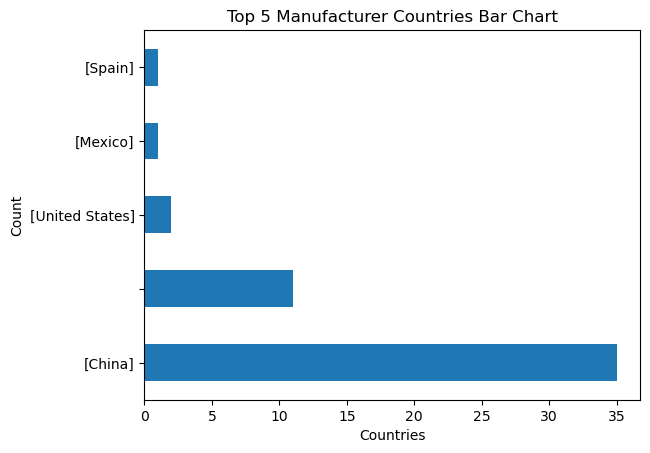

In [6]:
import matplotlib.pyplot as plt

df['manufacturer_countries'].value_counts().head().plot(kind='barh')
plt.title('Top 5 Manufacturer Countries Bar Chart')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

**4. Produce your own table or plot, and output it to streamlit.**

I made a table for streamlit. The file can be found in the same lab folder as this notebook, and is called country.py


**5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.**

I used an API that keeps track of data for the Formula 1 racing series.

In [7]:
import pandas as pd
import urllib.request
import json
import requests
url = 'https://ergast.com/api/f1/' # Location of the API
query = 'constructorStandings/1.json?limit=100' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
data = data['MRData']["StandingsTable"]["StandingsLists"]

response.close()
df = pd.DataFrame.from_dict(data)
df.head()

,season,round,ConstructorStandings
0,1958,11,"[{'position': '1', 'positionText': '1', 'point..."
1,1959,9,"[{'position': '1', 'positionText': '1', 'point..."
2,1960,10,"[{'position': '1', 'positionText': '1', 'point..."
3,1961,8,"[{'position': '1', 'positionText': '1', 'point..."
4,1962,9,"[{'position': '1', 'positionText': '1', 'point..."


In [8]:
# flattening the data
flattened_data = []
for item in data:
    season = int(item['season'])
    round_number = int(item['round'])
    for constructor in item['ConstructorStandings']:
        flattened_data.append({
            'season': season,
            'round': round_number,
            'position': int(constructor['position']),
            'points': float(constructor['points']) ,
            'wins': int(constructor['wins']) ,
            'constr_name': constructor['Constructor']['name'],
            'constr_nationality': constructor['Constructor']['nationality'],
        })

df = pd.DataFrame(flattened_data)
print(df.head())

   season  round  position  points  wins    constr_name constr_nationality
0    1958     11         1    48.0     6        Vanwall            British
1    1959      9         1    40.0     5  Cooper-Climax            British
2    1960     10         1    48.0     6  Cooper-Climax            British
3    1961      8         1    45.0     5        Ferrari            Italian
4    1962      9         1    42.0     4            BRM            British


In [9]:
df.describe()

,season,round,position,points,wins
count,66.000000,66.000000,66.0,66.000000,66.000000
mean,1990.500000,15.712121,1.0,231.219697,8.681818
std,19.196354,3.494018,0.0,234.640857,4.057885
min,1958.000000,8.000000,1.0,40.000000,3.000000
25%,1974.250000,14.250000,1.0,73.250000,6.000000
50%,1990.500000,16.000000,1.0,140.000000,8.000000
75%,2006.750000,17.750000,1.0,205.500000,10.750000
max,2023.000000,22.000000,1.0,860.000000,21.000000


In [10]:
# Table of the 10 most recent constructors champions
winners = df.sort_values(by='season', ascending=False).head(10)
print(winners)

    season  round  position  points  wins constr_name constr_nationality
65    2023     22         1   860.0    21    Red Bull           Austrian
64    2022     22         1   759.0    17    Red Bull           Austrian
63    2021     22         1   613.5     9    Mercedes             German
62    2020     17         1   573.0    13    Mercedes             German
61    2019     21         1   739.0    15    Mercedes             German
60    2018     21         1   655.0    11    Mercedes             German
59    2017     20         1   668.0    12    Mercedes             German
58    2016     21         1   765.0    19    Mercedes             German
57    2015     19         1   703.0    16    Mercedes             German
56    2014     19         1   701.0    16    Mercedes             German


[Text(0.5, 1.0, 'Wins by Winning Constructor over Time'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Wins In the Season')]

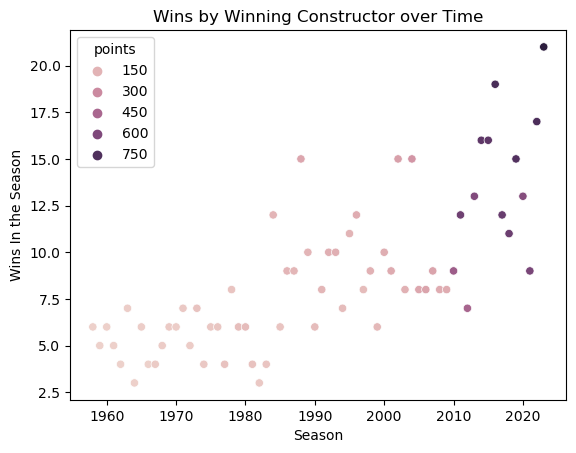

In [11]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

var1 = 'season'
var2 = 'wins'
cat1 = 'points'

sns.scatterplot(data=df, x=var1, y=var2,hue=cat1).set(title='Wins by Winning Constructor over Time',xlabel='Season',ylabel='Wins In the Season') 

The chart above shows how many wins the winning team had for each season (each season takes place over the course of 1 year). The winning team is the team who finished the season with the most points, so the color of the points reflect how many points were earned. For context, the number of races held per year has increased over time, which contributes to the upward slope of the points on this graph. As a side not, the scoring systems have also changed over time. 

[Text(0.5, 1.0, 'Win Ratio of Winning Constructor over Time'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Wins Ratio')]

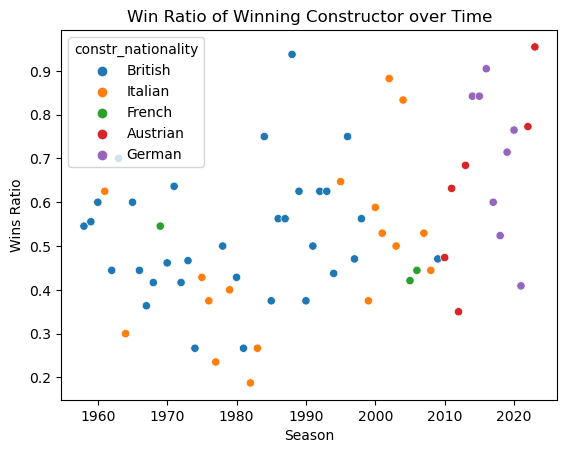

In [12]:
df['win_ratio'] = df['wins'].astype(float) / df['round'].astype(float)

var1 = 'season'
var2 = 'win_ratio'
cat1 = 'constr_nationality'

sns.scatterplot(data=df, x=var1, y=var2,hue=cat1).set(title='Win Ratio of Winning Constructor over Time',xlabel='Season',ylabel='Wins Ratio') 

The graph above instead plots the ratio of wins to the total number of races held, to account for the fact that the number of races has increased over time. We can see a slight positive relationship, demonstrating that champion teams win a larger proportion of races in more recent times. This could be partially due to the increased performance and reliability of race cars today. The champions are also colored by the teams' nationality, and we see a majority of championships have been won by British teams. 

In [14]:
wins_by_country = df['constr_nationality'].value_counts().reset_index()
wins_by_country.columns = ['Constructor Country', 'Total Championships']
wins_by_country = wins_by_country.sort_values(by='Total Championships', ascending=False)

print(wins_by_country)

  Constructor Country  Total Championships
0             British                   32
1             Italian                   17
2              German                    8
3            Austrian                    6
4              French                    3


In [15]:
championships_by_team = df['constr_name'].value_counts().reset_index()
championships_by_team.columns = ['Constructor', 'Total Championships']
championships_by_team = championships_by_team.sort_values(by='Total Championships', ascending=False)

print(championships_by_team)

      Constructor  Total Championships
0         Ferrari                   16
1        Williams                    9
2        Mercedes                    8
3         McLaren                    8
4        Red Bull                    6
5      Team Lotus                    4
9         Renault                    2
8    Lotus-Climax                    2
7   Brabham-Repco                    2
6   Cooper-Climax                    2
10     Lotus-Ford                    1
11     Matra-Ford                    1
12        Tyrrell                    1
13       Benetton                    1
14          Brawn                    1
15            BRM                    1
16        Vanwall                    1


The two tables above show championships won by country, and then by team. Interestingly, Ferrari (an Italian team) has the most championship wins, even though the UK has the most overall. 